In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ds_original = pd.read_csv("crimes_selected.csv")
ds_new = pd.read_csv("working_dataset.csv")

In [36]:
ds_original.head()

,CASE_NUMBER,Date,Block,Location Description,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude
0,hs227745,03/27/2010 04:50:00 AM,124xx_s_michigan_ave,house,False,532,5.0,9.0,53.0,41.668569,-87.620189
1,hs335199,05/31/2010 03:44:00 AM,026xx_s_ridgeway_ave,alley,False,1031,10.0,22.0,30.0,41.843516,-87.718433
2,hs440368,08/01/2010 12:32:00 PM,124xx_s_eggleston_ave,house,False,523,5.0,34.0,53.0,41.668029,-87.633158
3,hs460541,08/13/2010 01:03:00 PM,020xx_e_71st_st,street,False,331,3.0,5.0,43.0,41.766250,-87.575528
4,hs501948,09/06/2010 06:55:00 PM,027xx_w_24th_st,auto,False,1034,10.0,12.0,30.0,41.848287,-87.693730


In [37]:
ds_new.head()

,CASE_NUMBER,NUM_CRIMES_DISTRICT,NUM_CRIMES_BEAT,NUM_CRIMES_COMM_AREA,NUM_CRIMES_WARD,NUM_CRIMES_BLOCK,NUM_CRIMES_ZIP_CODE,NUM_CRIMES_STREET_ORG,AREA_INCOME,AREA_ASSAULT_HOMICIDE,...,IS_KILLED_A_CHILD,MULTIPLE_ARRESTS,HAS_STREET_ORGANIZATION,IS_RATIAL,ARRESTED_RACE,VICTIM_RACE,AVER_AGE,AVG_NUM_CHARGES,IMMEDIATE_ARREST,IS_HOMICIDE
0,hs227745,140,13,55,89,1,145,0,16228,43.9,...,0,0,0,0,_4102,_4100,35.0,2.0,0,1
1,hs335199,150,12,52,43,1,185,50,10697,11.1,...,0,0,1,0,_1142,_1140,25.0,1.0,0,1
2,hs440368,140,19,55,93,1,145,30,16228,43.9,...,0,0,1,0,_1142,_1140,25.0,1.0,0,1
3,hs460541,175,22,99,66,2,117,103,18366,33.4,...,0,0,1,0,_1142,_1140,25.0,1.0,0,1
4,hs501948,150,11,52,41,2,60,7,10697,11.1,...,0,0,1,0,_1142,_1140,25.0,1.0,0,1


<AxesSubplot:>

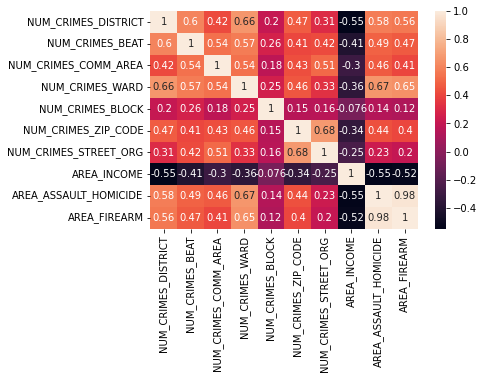

In [38]:
sns.heatmap(ds_new.corr().iloc[0:10, 0:10], annot=True)

<AxesSubplot:>

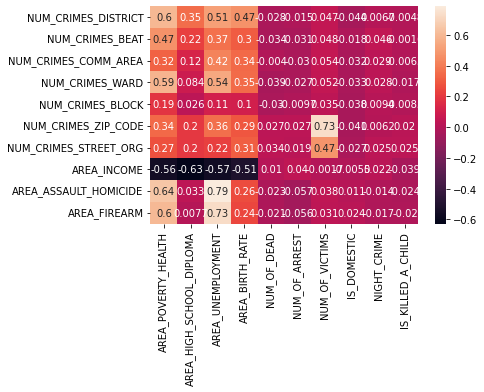

In [39]:
sns.heatmap(ds_new.corr().iloc[0:10, 10:20], annot=True)

<AxesSubplot:>

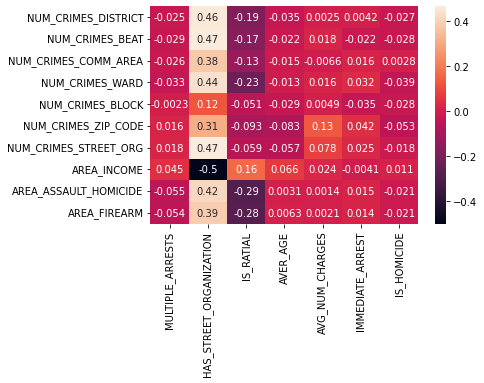

In [40]:
sns.heatmap(ds_new.corr().iloc[0:10, 20:30], annot=True)

<AxesSubplot:>

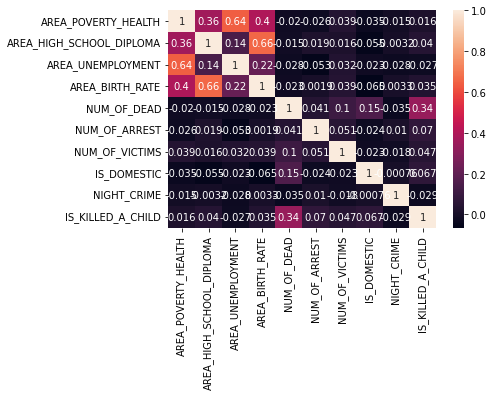

In [41]:
sns.heatmap(ds_new.corr().iloc[10:20, 10:20], annot=True)

<AxesSubplot:>

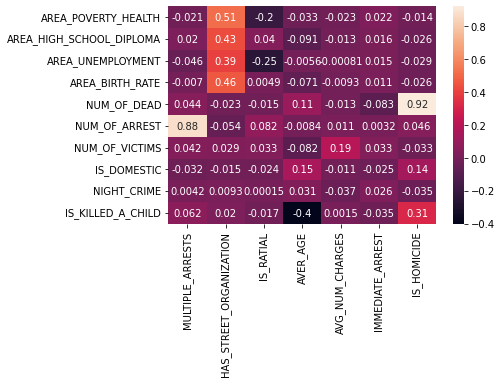

In [42]:
sns.heatmap(ds_new.corr().iloc[10:20, 20:30], annot=True)

<AxesSubplot:>

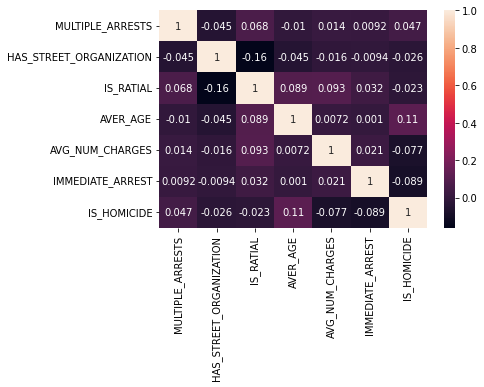

In [43]:
sns.heatmap(ds_new.corr().iloc[20:30, 20:30], annot=True)

0.5139776357827476


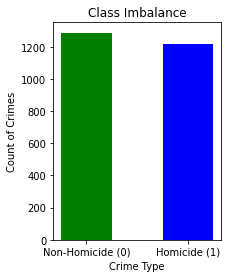

In [44]:
# Plotting the Imbalance

x=['Non-Homicide (0)','Homicide (1)']
y=[len(ds_new[ds_new['IS_HOMICIDE'] == 0]), len(ds_new[ds_new['IS_HOMICIDE'] == 1])]
fig, ax = plt.subplots(figsize=(3, 4))
plt.bar(x,y, color=['green', 'blue', 'red'], width=0.5)
# plt.title('THE IMBALANCE IN THE DATASET')
plt.xlabel('Crime Type')
plt.ylabel('Count of Crimes')
plt.title("Class Imbalance")
print(str(len(ds_new[ds_new['IS_HOMICIDE'] == 0]) / (len(ds_new[ds_new['IS_HOMICIDE'] == 0]) + len(ds_new[ds_new['IS_HOMICIDE'] == 1]))))

In [45]:
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error, mean_squared_error, accuracy_score,\
    max_error

# for average -> "macro" or "micro"
def print_classifier_scores(true_y, pred_y, beta=1.0, average="macro"):
    
    (pr, rec, f_sc, su) = precision_recall_fscore_support(y_true=true_y, y_pred=pred_y, beta=beta, average=average)
    acc = accuracy_score(y_true=true_y, y_pred=pred_y)
    print("Accuracy:\t" + str(acc))
    print("Precision:\t" + str(pr))
    print("Recall:\t\t" + str(rec))
    print("F-measure" + ":\t" + str(f_sc))
    print("(beta " + str(beta) + ")")

In [46]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone

def k_fold(X: pd.DataFrame, y: pd.Series, n_folds: int, classifier, verbose=False):

    kf = model_selection.KFold(n_splits=n_folds)
    i_train = 0
    i_test = 0
    j = 1
    max_score = 0
    curr_test_score = 0
    
    """
    if model_type=="tree":
        curr_tree = DecisionTreeClassifier(max_depth=5)
    elif model_type=="grad_boost":
        curr_tree = GradientBoostingClassifier()
    elif model_type=="random_forest":
        curr_tree = RandomForestClassifier(n_estimators=20)
        """
    

    for train_indexes, test_indexes in kf.split(X, y):
        curr_classifier = clone(classifier)
        curr_classifier = curr_classifier.fit(X.iloc[train_indexes], y[train_indexes])
        
        curr_train_score = curr_classifier.score(X.iloc[train_indexes], y[train_indexes])
        curr_test_score = curr_classifier.score(X.iloc[test_indexes], y[test_indexes])

        if verbose:
            print("Fold " + str(j) + "/" + str(n_folds))
            print("--------MODEL " + str(j) + " QUALITY--------")

            print("-------| Training |-----------")

            print_classifier_scores(true_y=y[train_indexes], 
                                pred_y=curr_classifier.predict(X.iloc[train_indexes]), beta=2.0)
        
            print("-------|   Test   |-----------")
            true_y = y[test_indexes]
            pred_y = curr_classifier.predict(X.iloc[test_indexes])
            print_classifier_scores(true_y=true_y, pred_y=pred_y, beta=2.0)


        if curr_test_score > max_score:
            best_classifier = curr_classifier
            max_score = curr_test_score

        j += 1
        i_train += curr_train_score
        i_test += curr_test_score

    mean_train_score = i_train / n_folds
    mean_test_score = i_test / n_folds

    return best_classifier, mean_train_score, mean_test_score

In [47]:
# extract info for trees


X: pd.DataFrame = ds_new.drop(columns=["CASE_NUMBER", "NUM_OF_DEAD", "IS_KILLED_A_CHILD",
                                            "IS_HOMICIDE", "VICTIM_RACE", "ARRESTED_RACE", "AVER_AGE"])

y: pd.Series = ds_new["IS_HOMICIDE"]

In [48]:


best_tree, mean_train_score, mean_test_score = k_fold(X, y, 10, classifier=DecisionTreeClassifier(max_depth=5), verbose=True)

Fold 1/10
--------MODEL 1 QUALITY--------
-------| Training |-----------
Accuracy:	0.5823346648912561
Precision:	0.6270308509403297
Recall:		0.5690907498054493
F-measure:	0.5376206018494801
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.5298804780876494
Precision:	0.6348240469208211
Recall:		0.5587164750957855
F-measure:	0.5034706219723272
(beta 2.0)
Fold 2/10
--------MODEL 2 QUALITY--------
-------| Training |-----------
Accuracy:	0.5730137594318686
Precision:	0.60771267878915
Recall:		0.564788208167604
F-measure:	0.5362068662208372
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.5737051792828686
Precision:	0.6116352201257862
Recall:		0.5587150127226463
F-measure:	0.5260560651755046
(beta 2.0)
Fold 3/10
--------MODEL 3 QUALITY--------
-------| Training |-----------
Accuracy:	0.5978695073235686
Precision:	0.6115841705464347
Recall:		0.5905346661196668
F-measure:	0.5785780887671914
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.5418326693227091
Precision:	0.559668508

In [49]:
print(mean_test_score)

classifier_path = "../models/decision_tree.csv"
save_model(best_tree, classifier_path)

0.5351203187250997


NameError: name 'save_model' is not defined

In [30]:
import pickle

def save_model(model, model_path):
    with open(model_path, "wb") as model_file:
        pickle.dump(model, model_file)

In [31]:
from sklearn import tree

first_dot = tree.export_graphviz(best_tree,
        feature_names=X.columns.tolist(),
        class_names=list(map(lambda x: str(x), y.unique().tolist())),
        filled=True,
        rounded=True,
        out_file="../models/best_tree.dot")

In [ ]:
import pydot

(graph,) = pydot.graph_from_dot_file('../models/best_tree.dot')
graph.write_png('../models/best_tree.png')

In [52]:
best_ensemble, mean_train_score, mean_test_score = k_fold(X, y, 10, classifier=GradientBoostingClassifier(), verbose=True)
print(mean_train_score, mean_test_score)

Fold 1/10
--------MODEL 1 QUALITY--------
-------| Training |-----------
Accuracy:	0.6782068353306702
Precision:	0.681625571166387
Recall:		0.6744902614161397
F-measure:	0.6730034442282609
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.545816733067729
Precision:	0.5553135313531353
Recall:		0.5535121328224777
F-measure:	0.5473557704523164
(beta 2.0)
Fold 2/10
--------MODEL 2 QUALITY--------
-------| Training |-----------
Accuracy:	0.6759875721260542
Precision:	0.6781226050548972
Recall:		0.674113578081777
F-measure:	0.6731805062291163
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.6135458167330677
Precision:	0.6135973597359736
Recall:		0.6094783715012723
F-measure:	0.6080277021609116
(beta 2.0)
Fold 3/10
--------MODEL 3 QUALITY--------
-------| Training |-----------
Accuracy:	0.6968486462494452
Precision:	0.7001974112666884
Recall:		0.6940186348144408
F-measure:	0.6928854392506825
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.5099601593625498
Precision:	0.513344370

In [17]:
best_forest, mean_train_score, mean_test_score = k_fold(X, y, 10, classifier=RandomForestClassifier(), verbose=True)

Fold 1/10
--------MODEL 1 QUALITY--------
-------| Training |-----------
Accuracy:	0.9458041958041958
Precision:	0.9457402554325853
Recall:		0.9458547478004542
F-measure:	0.9458244410109602
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.5647058823529412
Precision:	0.5651531930601699
Recall:		0.5655078559940616
F-measure:	0.5647610066308871
(beta 2.0)
Fold 2/10
--------MODEL 2 QUALITY--------
-------| Training |-----------
Accuracy:	0.9462412587412588
Precision:	0.9462557890224623
Recall:		0.9462868207813326
F-measure:	0.9462610620138485
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.5411764705882353
Precision:	0.5387092700176812
Recall:		0.5377788734130408
F-measure:	0.5367647058823529
(beta 2.0)
Fold 3/10
--------MODEL 3 QUALITY--------
-------| Training |-----------
Accuracy:	0.9453671328671329
Precision:	0.9453253062319316
Recall:		0.945403932934659
F-measure:	0.9453825405152121
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.5333333333333333
Precision:	0.5354037

In [53]:
# Plotting the Imbalance
def plot_scores(x_values, train_scores, test_scores, to_print):
    fig, ax = plt.subplots()
    
    ax.plot(x_values, train_scores)
    ax.plot(x_values, test_scores)
    
    plt.xlabel(to_print)
    plt.ylabel('Scores')
    plt.ylim(0, 1)
    plt.title("Training and test scores")
    plt.show()

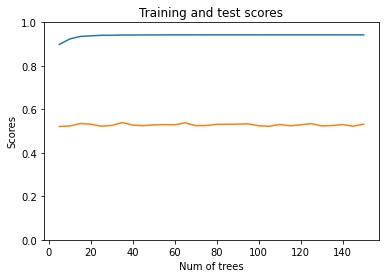

In [54]:
mean_train_score = []
mean_test_score = []

for i in range(5, 151, 5):
    best_forest, train_sc, test_sc = k_fold(X, y, 10, classifier=RandomForestClassifier(n_estimators=i))
    mean_train_score.append(train_sc)
    mean_test_score.append(test_sc)
    
plot_scores([i for i in range(5, 151, 5)], mean_train_score, mean_test_score, "Num of trees")

Criterion: entropy
Media score: 0.5301562284196548


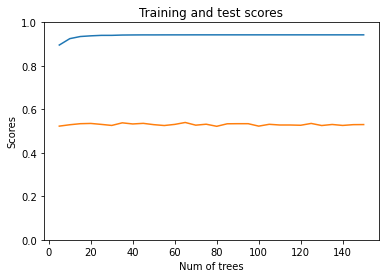

Criterion: log_loss
Media score: 0.5286654980079682


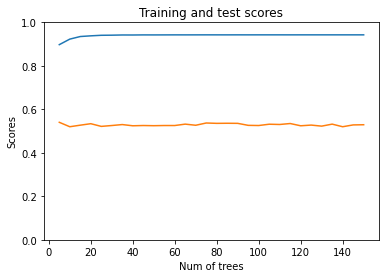

Criterion: gini
Media score: 0.5293690836653386


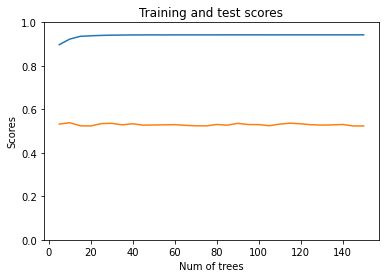

In [55]:
import numpy as np

for crit in {"gini", "entropy", "log_loss"}:
    mean_train_score = []
    mean_test_score = []
    print(f"Criterion: {crit}")
    for i in range(5, 151, 5):
        best_forest, train_sc, test_sc = k_fold(X, y, 10, classifier=RandomForestClassifier(n_estimators=i, criterion=crit))
        mean_train_score.append(train_sc)
        mean_test_score.append(test_sc)
        
    print(f"Media score: {np.average(mean_test_score)}")

    plot_scores([i for i in range(5, 151, 5)], mean_train_score, mean_test_score, "Num of trees")


Media score: 0.5353315780356832


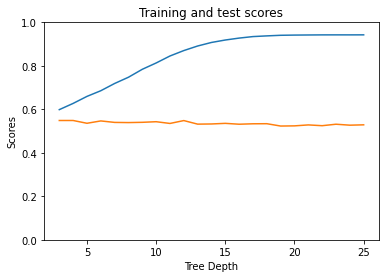

In [56]:
mean_train_score = []
mean_test_score = []

for i in range(3, 26):
    best_forest, train_sc, test_sc = k_fold(X, y, 10, classifier=RandomForestClassifier(max_depth=i))
    mean_train_score.append(train_sc)
    mean_test_score.append(test_sc)

print(f"Media score: {np.average(mean_test_score)}")

plot_scores([i for i in range(3, 26)], mean_train_score, mean_test_score, "Tree Depth")

Criterion: entropy
Media score: 0.5242270569894337


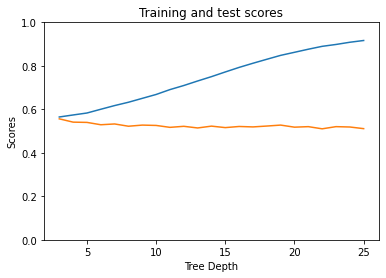

Criterion: log_loss
Media score: 0.5236020786419538


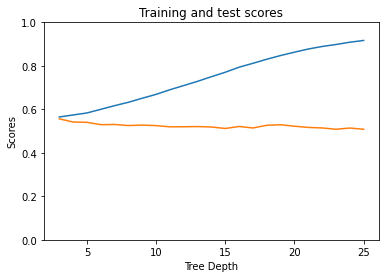

Criterion: gini
Media score: 0.5223445002598303


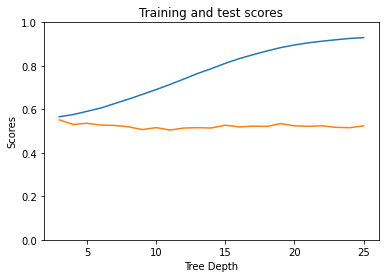

In [57]:
for crit in {"gini", "entropy", "log_loss"}:
    print(f"Criterion: {crit}")
    
    mean_train_score = []
    mean_test_score = []

    for i in range(3, 26):
        best_forest, train_sc, test_sc = k_fold(X, y, 10, classifier=DecisionTreeClassifier(max_depth=i, criterion=crit))
        mean_train_score.append(train_sc)
        mean_test_score.append(test_sc)

    print(f"Media score: {np.average(mean_test_score)}")

    plot_scores([i for i in range(3, 26)], mean_train_score, mean_test_score, "Tree Depth")

Loss: gini
Media score: 0.5467523505976095


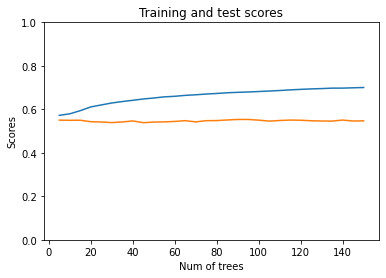

Loss: gini
Media score: 0.5447444887118194


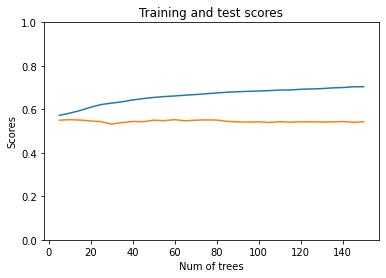

In [58]:
for loss in {"exponential", "log_loss"}:
    mean_train_score = []
    mean_test_score = []
    print(f"Loss: {crit}")
    for i in range(5, 151, 5):
        best_forest, train_sc, test_sc = k_fold(X, y, 10, classifier=GradientBoostingClassifier(n_estimators=i, loss=loss))
        mean_train_score.append(train_sc)
        mean_test_score.append(test_sc)
        
    print(f"Media score: {np.average(mean_test_score)}")

    plot_scores([i for i in range(5, 151, 5)], mean_train_score, mean_test_score, "Num of trees")


Media score: 0.5467013545816732


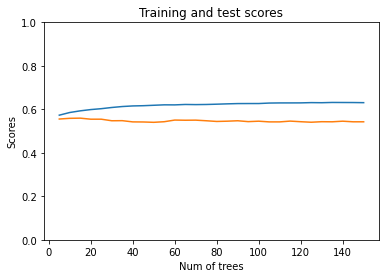

In [59]:
from sklearn.ensemble import AdaBoostClassifier


mean_train_score = []
mean_test_score = []
for i in range(5, 151, 5):
    best_forest, train_sc, test_sc = k_fold(X, y, 10, classifier=AdaBoostClassifier(n_estimators=i))
    mean_train_score.append(train_sc)
    mean_test_score.append(test_sc)

print(f"Media score: {np.average(mean_test_score)}")

plot_scores([i for i in range(5, 151, 5)], mean_train_score, mean_test_score, "Num of trees")


In [69]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
encoder = LabelEncoder()
encoder_beat = LabelEncoder()



complete_df: pd.DataFrame = pd.merge(ds_original, ds_new, on="CASE_NUMBER")

df_for_nb = complete_df.drop(["CASE_NUMBER", "Date", "Block", "Latitude", "Longitude", "NUM_CRIMES_DISTRICT", "NUM_CRIMES_BEAT", "NUM_CRIMES_COMM_AREA", "NUM_CRIMES_WARD", "NUM_CRIMES_BLOCK", "NUM_CRIMES_ZIP_CODE", "NUM_CRIMES_STREET_ORG", "AVG_NUM_CHARGES", "AREA_INCOME", "AREA_ASSAULT_HOMICIDE", "AREA_FIREARM", "AREA_POVERTY_HEALTH", "AREA_HIGH_SCHOOL_DIPLOMA", "AREA_UNEMPLOYMENT", "AREA_BIRTH_RATE", "NUM_OF_DEAD", "NUM_OF_VICTIMS", "IS_KILLED_A_CHILD", "MULTIPLE_ARRESTS", "ARRESTED_RACE", "VICTIM_RACE", "AVER_AGE"], axis=1)

df_for_nb["Location Description"] = encoder.fit_transform(df_for_nb["Location Description"])
df_for_nb["Beat"] = encoder_beat.fit_transform(df_for_nb["Beat"])



X = df_for_nb.drop(["IS_HOMICIDE"], axis=1)
y = df_for_nb["IS_HOMICIDE"]

print(X.nunique())

best_nb, score_train, score_test = k_fold(X, y, 10, CategoricalNB(min_categories=X.nunique()), verbose=True)


print("Score test: " + str(score_test))


Location Description        87
Domestic                     2
Beat                       260
District                    22
Ward                        50
Community Area              76
NUM_OF_ARREST                6
IS_DOMESTIC                  2
NIGHT_CRIME                  2
HAS_STREET_ORGANIZATION      2
IS_RATIAL                    2
IMMEDIATE_ARREST             2
dtype: int64
Fold 1/10
--------MODEL 1 QUALITY--------
-------| Training |-----------
Accuracy:	0.7718597425654683
Precision:	0.7715031783189242
Recall:		0.7715031783189242
F-measure:	0.7715031783189242
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.6932270916334662
Precision:	0.6983608656678192
Recall:		0.6978288633461047
F-measure:	0.6948027497493984
(beta 2.0)
Fold 2/10
--------MODEL 2 QUALITY--------
-------| Training |-----------
Accuracy:	0.7771859742565468
Precision:	0.7773654170797717
Recall:		0.7775215829266984
F-measure:	0.7773173526355582
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.73705179282

In [70]:
for column in X.columns:
    X_reduced = X.drop([column], axis=1)
    best_nb, score_train, score_test = k_fold(X_reduced, y, 10, CategoricalNB(min_categories=X_reduced.nunique()))
    print(f"---------| Dropping {column} |-------")
    print("Score train: " + str(score_train))
    print("Score test: " + str(score_test))
    

---------| Dropping Location Description |-------
Score train: 0.6345843321986931
Score test: 0.5243187250996015
---------| Dropping Domestic |-------
Score train: 0.780173334892922
Score test: 0.7072382470119523
---------| Dropping Beat |-------
Score train: 0.7583415546499965
Score test: 0.7160223107569721
---------| Dropping District |-------
Score train: 0.7836790618522637
Score test: 0.712412749003984
---------| Dropping Ward |-------
Score train: 0.7814602712502821
Score test: 0.7100286852589642
---------| Dropping Community Area |-------
Score train: 0.7843003767824505
Score test: 0.7128254980079681
---------| Dropping NUM_OF_ARREST |-------
Score train: 0.7767566147630823
Score test: 0.7068318725099602
---------| Dropping IS_DOMESTIC |-------
Score train: 0.7804842483511091
Score test: 0.7088334661354581
---------| Dropping NIGHT_CRIME |-------
Score train: 0.7793304480942496
Score test: 0.7076366533864542
---------| Dropping HAS_STREET_ORGANIZATION |-------
Score train: 0.7803

In [71]:
# conclusion: the most important is location description, whereas Beat (we could expect it due to the high number of values)
# push the model towards overfitting -> by removing it train_score lowered and test_scored improved
X_corrected = X.drop(["Beat"], axis=1)

# GO ON with the reduction
for column in X_corrected.columns:
    X_reduced = X_corrected.drop([column], axis=1)
    best_nb, score_train, score_test = k_fold(X_reduced, y, 10, CategoricalNB(min_categories=X_reduced.nunique()))
    print(f"---------| Dropping {column} |-------")
    print("Score train: " + str(score_train))
    print("Score test: " + str(score_test))

---------| Dropping Location Description |-------
Score train: 0.6009490254736758
Score test: 0.5279235059760957
---------| Dropping Domestic |-------
Score train: 0.7598947238248046
Score test: 0.717219123505976
---------| Dropping District |-------
Score train: 0.7604716337991226
Score test: 0.7200159362549801
---------| Dropping Ward |-------
Score train: 0.7603825678942913
Score test: 0.72640796812749
---------| Dropping Community Area |-------
Score train: 0.7541706000990102
Score test: 0.7168318725099602
---------| Dropping NUM_OF_ARREST |-------
Score train: 0.7561229412740028
Score test: 0.7140223107569722
---------| Dropping IS_DOMESTIC |-------
Score train: 0.7600273479391177
Score test: 0.7180191235059761
---------| Dropping NIGHT_CRIME |-------
Score train: 0.7594953352150795
Score test: 0.7168239043824701
---------| Dropping HAS_STREET_ORGANIZATION |-------
Score train: 0.7604271500761481
Score test: 0.71921593625498
---------| Dropping IS_RATIAL |-------
Score train: 0.75

In [72]:
# SAME THING FOR COMM AREA
X_corrected = X_corrected.drop(["Community Area"], axis=1)

# GO ON with the reduction
for column in X_corrected.columns:
    X_reduced = X_corrected.drop([column], axis=1)
    best_nb, score_train, score_test = k_fold(X_reduced, y, 10, CategoricalNB(min_categories=X_reduced.nunique()))
    print(f"---------| Dropping {column} |-------")
    print("Score train: " + str(score_train))
    print("Score test: " + str(score_test))

---------| Dropping Location Description |-------
Score train: 0.5852410529429164
Score test: 0.5363139442231076
---------| Dropping Domestic |-------
Score train: 0.7549686487227322
Score test: 0.7172350597609563
---------| Dropping District |-------
Score train: 0.7570551696623766
Score test: 0.7288079681274902
---------| Dropping Ward |-------
Score train: 0.7487576064409438
Score test: 0.7204207171314742
---------| Dropping NUM_OF_ARREST |-------
Score train: 0.751685419145369
Score test: 0.7128414342629481
---------| Dropping IS_DOMESTIC |-------
Score train: 0.7568771560033728
Score test: 0.722420717131474
---------| Dropping NIGHT_CRIME |-------
Score train: 0.7541706394825631
Score test: 0.7168302788844622
---------| Dropping HAS_STREET_ORGANIZATION |-------
Score train: 0.7568769393938319
Score test: 0.7184286852589642
---------| Dropping IS_RATIAL |-------
Score train: 0.7519964113706618
Score test: 0.713644621513944
---------| Dropping IMMEDIATE_ARREST |-------
Score train: 

In [73]:
# SAME THING FOR Ward
X_corrected = X_corrected.drop(["Ward"], axis=1)

# GO ON with the reduction
for column in X_corrected.columns:
    X_reduced = X_corrected.drop([column], axis=1)
    best_nb, score_train, score_test = k_fold(X_reduced, y, 10, CategoricalNB(min_categories=X_reduced.nunique()))
    print(f"---------| Dropping {column} |-------")
    print("Score train: " + str(score_train))
    print("Score test: " + str(score_test))

---------| Dropping Location Description |-------
Score train: 0.5763221354077438
Score test: 0.5562916334661354
---------| Dropping Domestic |-------
Score train: 0.755501626343816
Score test: 0.72881593625498
---------| Dropping District |-------
Score train: 0.7602506133003771
Score test: 0.7447649402390437
---------| Dropping NUM_OF_ARREST |-------
Score train: 0.7530613820240073
Score test: 0.7244286852589641
---------| Dropping IS_DOMESTIC |-------
Score train: 0.7588295168701419
Score test: 0.7419888446215139
---------| Dropping NIGHT_CRIME |-------
Score train: 0.7485802032270096
Score test: 0.7196191235059761
---------| Dropping HAS_STREET_ORGANIZATION |-------
Score train: 0.7551912642553693
Score test: 0.7280191235059761
---------| Dropping IS_RATIAL |-------
Score train: 0.7464945093419757
Score test: 0.7196270916334662
---------| Dropping IMMEDIATE_ARREST |-------
Score train: 0.7456958108896311
Score test: 0.7184286852589642


In [74]:
# SAME FOR DISTRICT
X_corrected = X_corrected.drop(["District"], axis=1)

# GO ON with the reduction
for column in X_corrected.columns:
    X_reduced = X_corrected.drop([column], axis=1)
    best_nb, score_train, score_test = k_fold(X_reduced, y, 10, CategoricalNB(min_categories=X_reduced.nunique()))
    print(f"---------| Dropping {column} |-------")
    print("Score train: " + str(score_train))
    print("Score test: " + str(score_test))

---------| Dropping Location Description |-------
Score train: 0.5698433637334979
Score test: 0.5674454183266933
---------| Dropping Domestic |-------
Score train: 0.7637112263998983
Score test: 0.7535665338645419
---------| Dropping NUM_OF_ARREST |-------
Score train: 0.7618918440994182
Score test: 0.7515697211155378
---------| Dropping IS_DOMESTIC |-------
Score train: 0.7597619027927272
Score test: 0.7523697211155379
---------| Dropping NIGHT_CRIME |-------
Score train: 0.7579881660300314
Score test: 0.7347633466135458
---------| Dropping HAS_STREET_ORGANIZATION |-------
Score train: 0.7581644468127087
Score test: 0.7439840637450199
---------| Dropping IS_RATIAL |-------
Score train: 0.7531513143670021
Score test: 0.7351649402390438
---------| Dropping IMMEDIATE_ARREST |-------
Score train: 0.754038507662661
Score test: 0.7291840637450199


In [75]:
# retain only Street Location
X_corrected = X_corrected["Location Description"]

# GO ON with the reduction

best_nb, score_train, score_test = k_fold(X_reduced, y, 10, CategoricalNB(min_categories=X_reduced.nunique()), verbose=True)
print("Score train: " + str(score_train))
print("Score test: " + str(score_test))

Fold 1/10
--------MODEL 1 QUALITY--------
-------| Training |-----------
Accuracy:	0.7585441633377719
Precision:	0.7795422031473533
Recall:		0.7637160207162939
F-measure:	0.7570802521377484
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.8047808764940239
Precision:	0.8184409340659341
Recall:		0.7960727969348659
F-measure:	0.7951415701415702
(beta 2.0)
Fold 2/10
--------MODEL 2 QUALITY--------
-------| Training |-----------
Accuracy:	0.7518863737239236
Precision:	0.7653531003593357
Recall:		0.7547053461311599
F-measure:	0.7504614974786733
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.7649402390438247
Precision:	0.7749837345478204
Recall:		0.7688613231552163
F-measure:	0.7651746031746032
(beta 2.0)
Fold 3/10
--------MODEL 3 QUALITY--------
-------| Training |-----------
Accuracy:	0.756768752774079
Precision:	0.7712841118393488
Recall:		0.7605240942943701
F-measure:	0.7558027745195455
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.7410358565737052
Precision:	0.7477557

2504


KeyError: ''

In [ ]:
# retain only Street Location
X_corrected = pd.DataFrame(X_corrected)

for column in X.columns:
    if column not in X_corrected.columns:
        X_augmented = X_corrected.assign(columns=X[column])
        best_nb, score_train, score_test = k_fold(X_augmented, y, 10, CategoricalNB(min_categories=X_augmented.nunique()))
        print(f"---------| Adding {column} |-------")
        print("Score train: " + str(score_train))
        print("Score test: " + str(score_test))

In [ ]:
# add NUM_OF_ARREST
X_corrected["NUM_OF_ARREST"] = X["NUM_OF_ARREST"]

for column in X.columns:
    if column not in X_corrected.columns:
        X_augmented = X_corrected.assign(columns=X[column])
        best_nb, score_train, score_test = k_fold(X_augmented, y, 10, CategoricalNB(min_categories=X_augmented.nunique()))
        print(f"---------| Adding {column} |-------")
        print("Score train: " + str(score_train))
        print("Score test: " + str(score_test))

In [ ]:
# add immediate arrests
X_corrected["IMMEDIATE_ARREST"] = X["IMMEDIATE_ARREST"]

for column in X.columns:
    if column not in X_corrected.columns:
        X_augmented = X_corrected.assign(columns=X[column])
        best_nb, score_train, score_test = k_fold(X_augmented, y, 10, CategoricalNB(min_categories=X_augmented.nunique()))
        print(f"---------| Adding {column} |-------")
        print("Score train: " + str(score_train))
        print("Score test: " + str(score_test))

In [77]:
def hill_climbing_feature_addition(X_start, X_complete, y, n_folds=10):
    best_model, train_score, test_score = k_fold(X_start, y, n_folds, CategoricalNB(min_categories=X_start.nunique()))
    print(f"Initial Scores: \n\tTR: {train_score} \n\tTE{test_score}")


    while len(X.columns) > len(X_start.columns):
        column_scores = {}
        for column in X.columns:
            if column not in X_start.columns:
                X_augmented = X_start.assign(columns=X[column])
                best_nb, score_train, score_test = k_fold(X_augmented, y, 10, CategoricalNB(min_categories=X_augmented.nunique()))
                column_scores[column] = (score_train, score_test)

        best_feature = max(column_scores, key=lambda x: column_scores[x][1])
        X_start[best_feature] = X[best_feature]
        print(f"---------| Adding {best_feature} |-------")
        print("Score train: " + str(score_train))
        print("Score test: " + str(score_test))
    

In [78]:
hill_climbing_feature_addition(pd.DataFrame(X["Location Description"]), X, y)

Initial Scores: 
	TR: 0.7564781612291765 
	TE0.7499681274900399
---------| Adding IS_DOMESTIC |-------
Score train: 0.7594068600635415
Score test: 0.7503713147410359
---------| Adding IMMEDIATE_ARREST |-------
Score train: 0.7593181289189098
Score test: 0.7535665338645419
---------| Adding IS_RATIAL |-------
Score train: 0.7595843617363579
Score test: 0.7539649402390438
---------| Adding HAS_STREET_ORGANIZATION |-------
Score train: 0.7599838684967415
Score test: 0.7543633466135458
---------| Adding NUM_OF_ARREST |-------
Score train: 0.7586969124476052
Score test: 0.7535649402390437
---------| Adding NIGHT_CRIME |-------
Score train: 0.7637112263998983
Score test: 0.7535665338645419
---------| Adding Domestic |-------
Score train: 0.7585635006622344
Score test: 0.731590438247012
---------| Adding Community Area |-------
Score train: 0.7594952367561972
Score test: 0.7299856573705179
---------| Adding District |-------
Score train: 0.7604716337991226
Score test: 0.7200159362549801
-----

In [79]:
from sklearn.neighbors import KNeighborsClassifier
df = ds_new
my_model = KNeighborsClassifier()
x = df.drop(["IS_HOMICIDE", "CASE_NUMBER", "VICTIM_RACE", "ARRESTED_RACE", "AVER_AGE", "NUM_OF_DEAD", "IS_KILLED_A_CHILD"], axis=1)
y = df["IS_HOMICIDE"]


for k in range(1, 31, 2):

    best_knn, tr_scores, te_scores = k_fold(x, y, 10, KNeighborsClassifier(n_neighbors=k))
    print(f"TR {tr_scores}")
    print(f"TE {te_scores}")
    k_scores.append(te_scores)

best_k = [np.argmax(k_scores)]
print("Best k is: ", best_k)

    

TR 0.9363686040617833
TE 0.5147936254980079


NameError: name 'k_scores' is not defined

In [80]:
from sklearn.naive_bayes import GaussianNB

X: pd.DataFrame = ds_new.drop(columns=["CASE_NUMBER", "NUM_OF_DEAD", "IS_KILLED_A_CHILD",
                                            "IS_HOMICIDE", "VICTIM_RACE", "ARRESTED_RACE", "AVER_AGE"])

y: pd.Series = ds_new["IS_HOMICIDE"]
    
best_model, train_score, test_score = k_fold(X, y, 10, verbose=True, classifier=GaussianNB())

print(str(test_score))

Fold 1/10
--------MODEL 1 QUALITY--------
-------| Training |-----------
Accuracy:	0.546826453617399
Precision:	0.5494513769363167
Recall:		0.548980601757507
F-measure:	0.5472344858927928
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.5219123505976095
Precision:	0.519720912450618
Recall:		0.5197637292464878
F-measure:	0.5197339195171642
(beta 2.0)
Fold 2/10
--------MODEL 2 QUALITY--------
-------| Training |-----------
Accuracy:	0.5565912117177098
Precision:	0.5644615048718691
Recall:		0.5600670908075815
F-measure:	0.5534201753984643
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.5099601593625498
Precision:	0.5181260457334077
Recall:		0.5165394402035624
F-measure:	0.5071204220412893
(beta 2.0)
Fold 3/10
--------MODEL 3 QUALITY--------
-------| Training |-----------
Accuracy:	0.5494895694629383
Precision:	0.554183067664281
Recall:		0.5525620897500632
F-measure:	0.5489627645188
(beta 2.0)
-------|   Test   |-----------
Accuracy:	0.4701195219123506
Precision:	0.4690330399285

In [ ]:
from sklearn.svm import SVC


best_model, train_score, test_score = k_fold(X, y, 10, verbose=True, classifier=SVC(kernel='sigmoid', gamma='auto'))
print(str(test_score))
    